# Importar librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge

from sklearn.utils import resample

import pickle

# Recolectar datos

In [2]:
!gdown https://drive.google.com/u/0/uc?id=1btfRTzgDTe0fmxUygquf_n_kiyYdTHCx&export=download

Downloading...
From: https://drive.google.com/u/0/uc?id=1btfRTzgDTe0fmxUygquf_n_kiyYdTHCx
To: /content/vehicles.csv
100% 1.45G/1.45G [00:17<00:00, 83.9MB/s]


In [3]:
df = pd.read_csv("vehicles.csv")

In [4]:
df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


# Preprocesar datos

##Limpieza de los datos + Ingeniería de características

In [5]:
df = df[['year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
         'odometer', 'title_status', 'transmission', 'drive', 'size', 'type',
         'paint_color', 'price']]

In [6]:
df.isna().sum()

year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
price                0
dtype: int64

In [7]:
fillable_nan_cols = df.columns[df.isna().sum() > 20000]
dropable_nan_cols = [col for col in df.columns if col not in fillable_nan_cols]

In [8]:
for col in dropable_nan_cols:
  df = df[df[col].notna()]

In [9]:
df = df.fillna('Unkown')

<Axes: xlabel='price', ylabel='Count'>

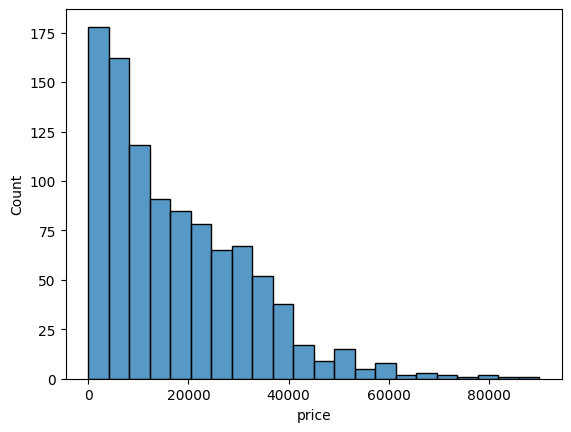

In [10]:
sns.histplot(df["price"].sample(1000))

<Axes: xlabel='manufacturer', ylabel='price'>

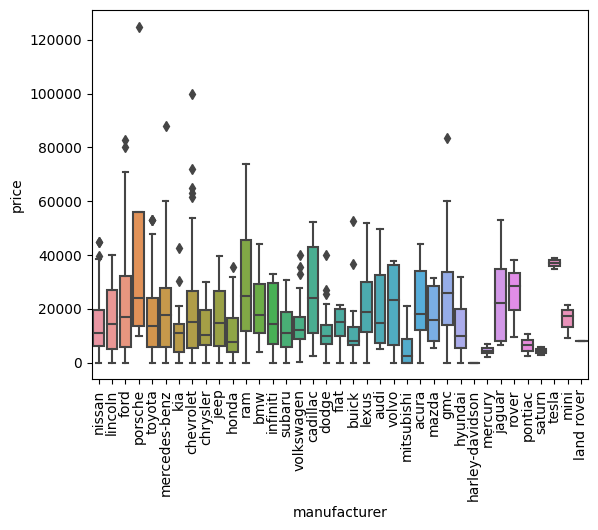

In [11]:
plt.xticks(rotation=90)
sns.boxplot(x="manufacturer", y="price", data=df.sample(1000))

<Axes: xlabel='year', ylabel='price'>

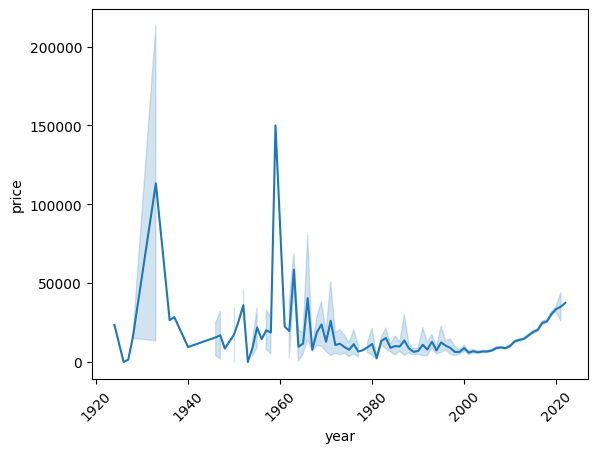

In [12]:
plt.xticks(rotation=45)
sns.lineplot(x="year", y="price", data=df.sample(10000))

<Axes: xlabel='odometer', ylabel='price'>

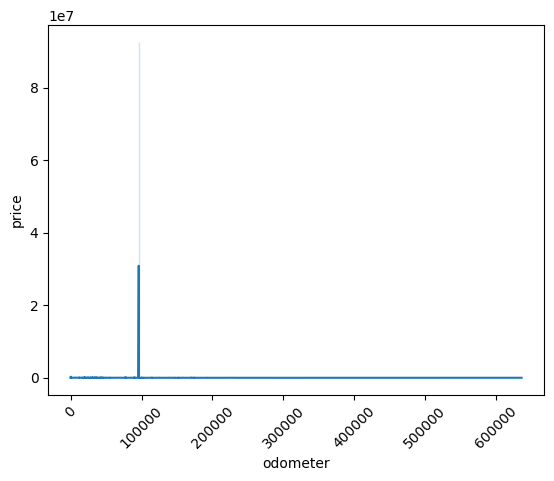

In [13]:
plt.xticks(rotation=45)
sns.lineplot(x="odometer", y="price", data=df.sample(1000))

<Axes: xlabel='fuel', ylabel='price'>

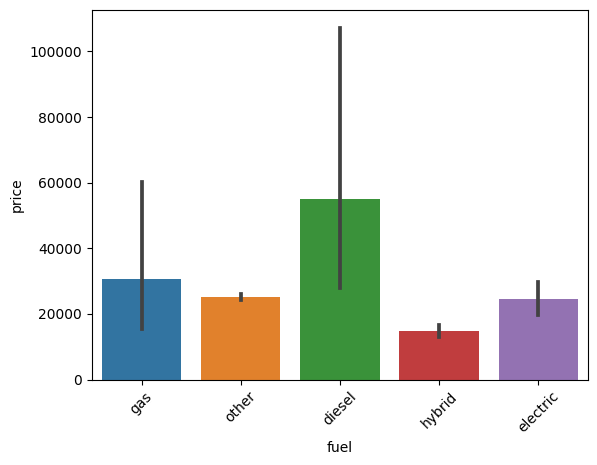

In [14]:
plt.xticks(rotation=45)
sns.barplot(x="fuel", y="price", data=df.sample(10000))

<Axes: xlabel='title_status', ylabel='price'>

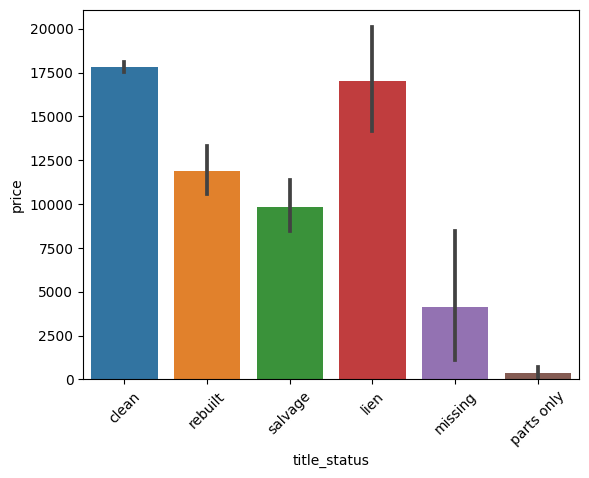

In [15]:
plt.xticks(rotation=45)
sns.barplot(x="title_status", y="price", data=df.sample(10000))

## Codificación

In [16]:
df = df.sample(2000)

In [17]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [18]:
numerical_columns = x.columns[(x.dtypes == "float64") | (x.dtypes == "int64")]
categorical_columns = x.columns[(x.dtypes == "object")]

In [19]:
col_transf = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), categorical_columns),
    (StandardScaler(), numerical_columns),
    remainder="passthrough"
)

#Entrenamiento + Evaluación

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=2, test_size=0.2)

In [24]:
models = []
models.append(("KNN", KNeighborsRegressor()))
models.append(("LR", LinearRegression()))
#models.append(("RR", Ridge())),
#models.append(("LASSOR", Lasso()))
#models.append(("BR", BayesianRidge()))
models.append(("RF", RandomForestRegressor()))
models.append(("SVR", SVR()))

In [25]:
pipelines = {name: make_pipeline(col_transf, model) for name, model in models}

In [26]:
results = []
scoring = 'r2'
kfolds = 5

for name, pipeline in pipelines.items():
	cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfolds, scoring=scoring)
	results.append({name: cv_results})

In [27]:
results

[{'KNN': array([-3.14087479e-03, -7.65862799e+06, -1.87351602e+07,  5.00841395e-01,
          3.76735976e-01])},
 {'LR': array([-3.14779802e-03, -6.12749268e+07, -5.36992845e+07, -5.15992810e+07,
         -3.24121972e+07])},
 {'RF': array([-3.14251824e-03, -1.61021536e+07, -1.17086722e+06,  5.57305902e-01,
         -2.94467149e+06])},
 {'SVR': array([-0.00313682, -0.06907226, -0.02454565, -0.03206181, -0.05256611])}]

In [28]:
best_model = sorted(results, key=lambda x: list(x.values())[0].mean(), reverse=True)[0]
best_pipeline = pipelines[list(best_model.keys())[0]]

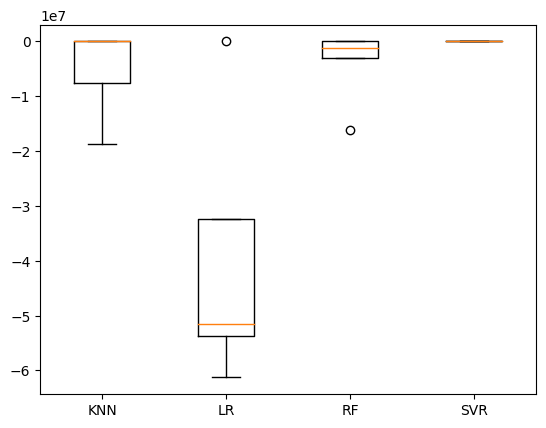

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot([list(dict_.values())[0] for dict_ in results])
ax.set_xticklabels([list(dict_.keys())[0] for dict_ in results])
plt.show()

#Predicciones

In [30]:
best_pipeline.fit(X_train, y_train)
best_pipeline.predict(X_test)

array([14548.66940346, 14502.4619393 , 14450.12010264, 14464.44059691,
       14536.9663062 , 14475.32801304, 14457.08727887, 14540.43336756,
       14531.78620312, 14416.37411594, 14491.44623802, 14487.7979723 ,
       14497.91513683, 14527.91922794, 14495.30375088, 14441.79988128,
       14407.40549934, 14418.20865971, 14558.46755095, 14498.90397615,
       14556.43549101, 14521.36033172, 14481.82100553, 14541.24157495,
       14544.52940342, 14559.73815804, 14467.09245332, 14450.17712717,
       14469.58804908, 14513.94387186, 14494.01689618, 14503.44053458,
       14451.01014342, 14505.32873756, 14446.14968133, 14549.45524816,
       14412.88743973, 14507.32178468, 14556.98321348, 14446.47605746,
       14443.42014934, 14459.19272008, 14453.43587257, 14458.9462652 ,
       14442.87566755, 14484.81026987, 14433.64796173, 14478.75838815,
       14513.80556674, 14556.48794155, 14545.9992727 , 14497.07285223,
       14456.09003601, 14503.64891607, 14482.57023428, 14512.20283604,
      

#Exportación del modelo

In [31]:
filename = 'vehicle_price_estimator.pkl'
pickle.dump(best_pipeline, open(filename, 'wb'))